## Relationship between Pollution Proximity Index and Minorties

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

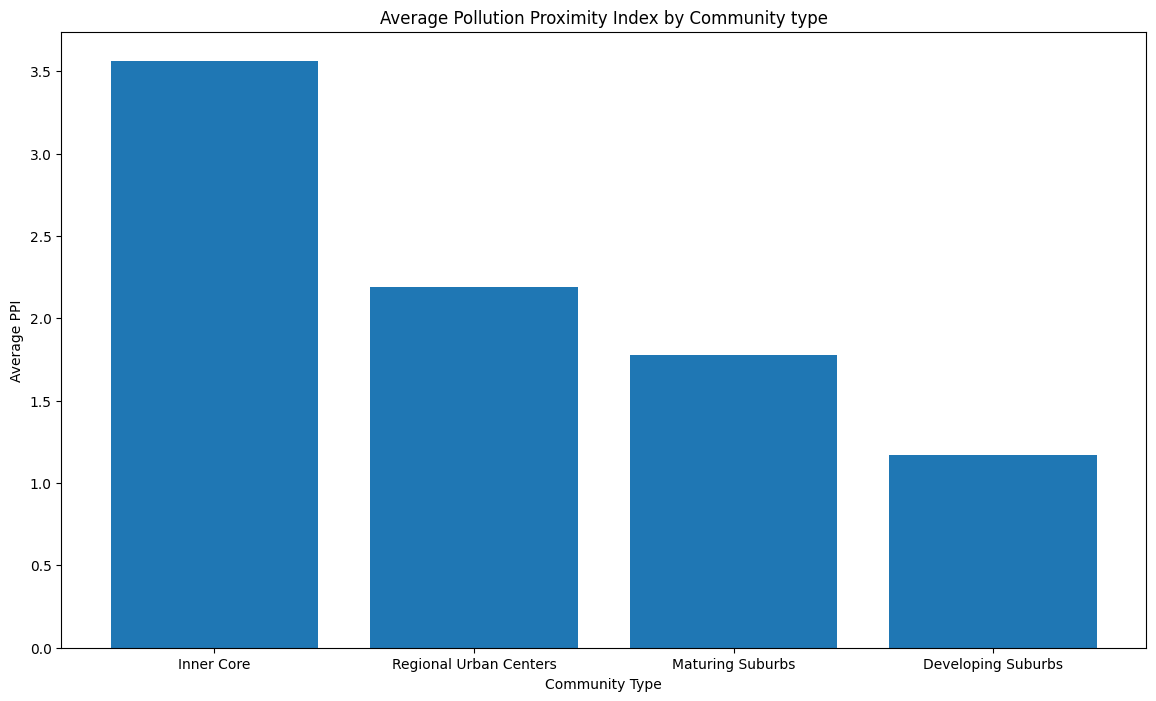

In [8]:
ppi = pd.read_csv('../data/csv_files/pollution_proximity_intensity.csv')

ppi.columns

ppi_filtered = ppi[['commtypid','commtype','ppi5','nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']]

ppi_by_commtype = (ppi_filtered.groupby(['commtypid','commtype']).mean().reset_index())

ppi_by_commtype.iloc[0,1] = "Unknown"

ppi_by_commtype = ppi_by_commtype.loc[ppi_by_commtype["commtype"]!="Unknown"]

plt.figure(figsize=(14,8))
plt.bar(ppi_by_commtype["commtype"], ppi_by_commtype["ppi5"])
plt.xlabel("Community Type")
plt.ylabel("Average PPI")
plt.title("Average Pollution Proximity Index by Community type")
plt.show()

- Average Pollution Proximity Index (PPI) from highest to lowest by community type is: Inner Core, Regional Urban Centers, Maturing Suburbs, Developing Suburbs

/var/folders/dr/5fwr6gys3_q2mlm3nwj706880000gn/T/ipykernel_61838/393652281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppi_filtered["minorities"] = (ppi_filtered["nhaa_10"]+ppi_filtered["nhapi_10"]+ppi_filtered["lat_10"]+ppi_filtered["nhoth_10"])/ \
/var/folders/dr/5fwr6gys3_q2mlm3nwj706880000gn/T/ipykernel_61838/393652281.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppi_filtered["bin"] = pd.cut(ppi_filtered["minorities"], bins=bins, labels=labels)
/var/folders/dr/5fwr6gys3_q2mlm3nwj706880000

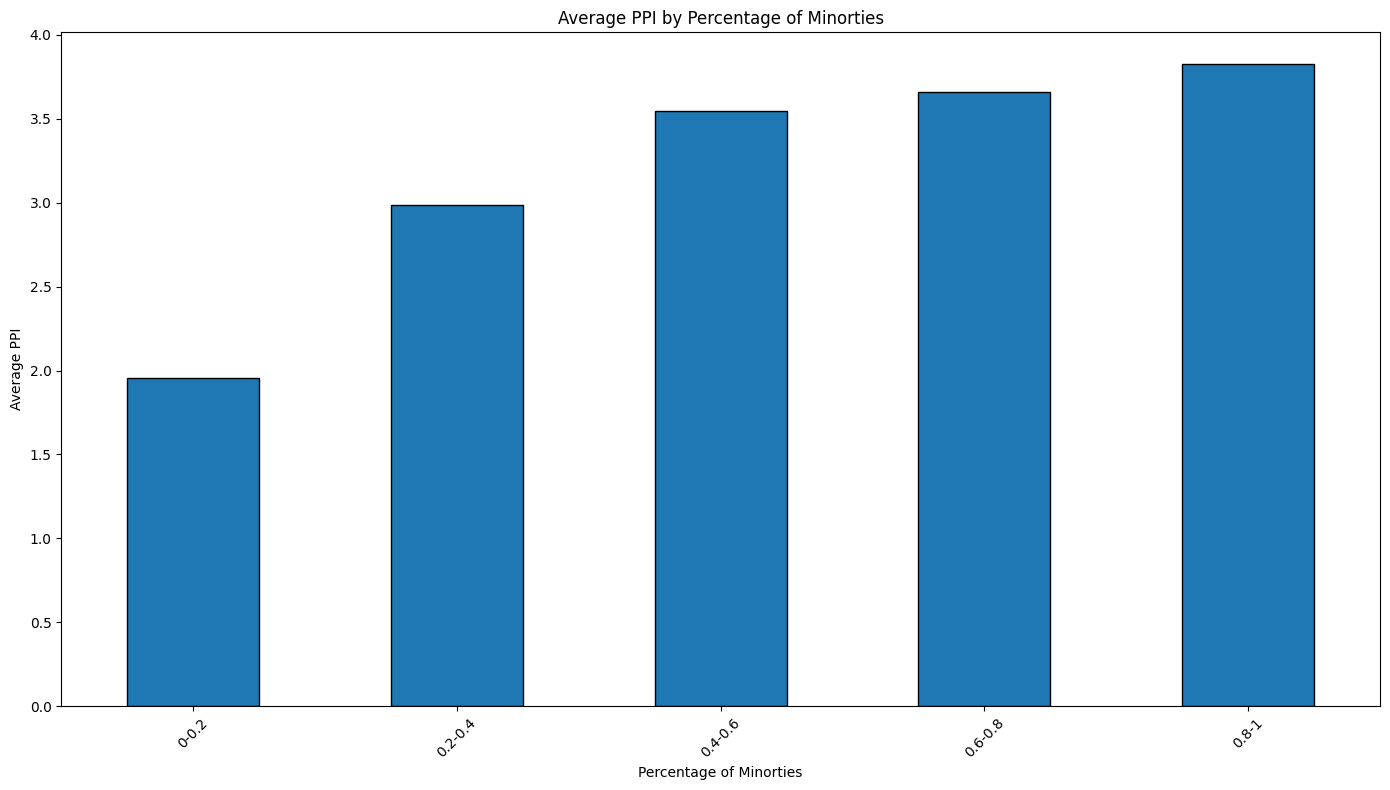

In [5]:
ppi_filtered["minorities"] = (ppi_filtered["nhaa_10"]+ppi_filtered["nhapi_10"]+ppi_filtered["lat_10"]+ppi_filtered["nhoth_10"])/ \
                            (ppi_filtered["nhwhi_10"]+ppi_filtered["nhaa_10"]+ppi_filtered["nhapi_10"]+ppi_filtered["lat_10"]+ppi_filtered["nhoth_10"])

bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

ppi_filtered["bin"] = pd.cut(ppi_filtered["minorities"], bins=bins, labels=labels)

binned_avg = ppi_filtered.groupby('bin')['ppi5'].mean()

plt.figure(figsize=(14,8))
binned_avg.plot(kind='bar', edgecolor='black')
plt.title('Average PPI by Percentage of Minorties')
plt.xlabel('Percentage of Minorties')
plt.ylabel('Average PPI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- As the percentage of minorities increases, the Pollution Proximity Index does too
- Minorities are more likely to be affected by pollution

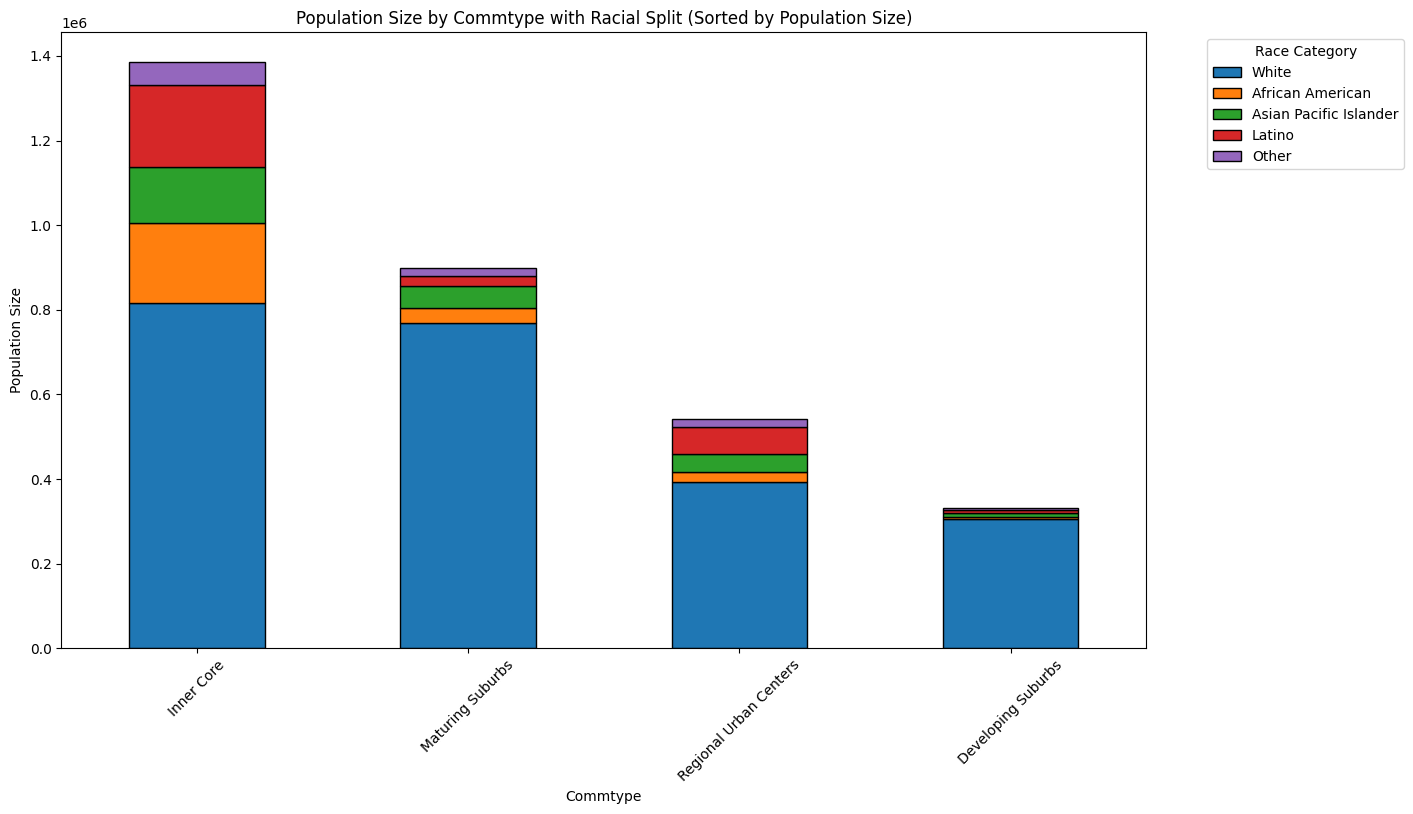

In [38]:
# Load the data
ppi = pd.read_csv('../data/csv_files/pollution_proximity_intensity.csv')

# Select the relevant columns for population and race
race_columns = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']
pop_columns = ['commtype'] + race_columns
ppi_pop = ppi[pop_columns]

# Sum the population within each race category for each commtype
pop_by_race = ppi_pop.groupby('commtype').sum().reset_index()
pop_by_race = pop_by_race.drop(0)
# Sort the DataFrame by total population size in descending order
pop_by_race = pop_by_race.sort_values(by=race_columns, ascending=False)

# Set the 'commtype' as the x-axis and plot a stacked bar chart for population by race
ax = pop_by_race.set_index('commtype')[race_columns].plot(kind='bar', stacked=True, figsize=(14, 8),
                                                         edgecolor='black')  # Add edgecolor attribute
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Commtype")
plt.ylabel("Population Size")
plt.title("Population Size by Commtype with Racial Split (Sorted by Population Size)")
legend_labels = ['White', 'African American', 'Asian Pacific Islander',
                 'Latino', 'Other']
plt.legend(legend_labels, title='Race Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- The order of community types by population size is not the same as the order of community types by PPI
- Order of community types by percentage of minorities in the community is the same as the order of community types by PPI
- PPI is more related to percentage of minorities than population size